# Step 3: EDA and Visualization

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import itertools
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa

In [1]:
#font = {'family' : 'normal',
        #'weight' : 'bold',
        #'size'   : 22}

#matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

Let's take a look at our specific county of Queens

In [5]:
df = pd.read_csv('zillow_data.csv')

In [6]:
df = df.drop(['RegionID'], axis=1)

In [8]:
queens_df = df[(df['CountyName'] == 'Queens') & (df['State'] == 'NY') ]
queens_df

,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
12,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,251200.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
85,11377,New York,NY,New York,Queens,86,179000.0,178900.0,179000.0,179000.0,...,736400,739100,741900,745700,749100,749900,750300,753000,758200,762500
99,11355,New York,NY,New York,Queens,100,182800.0,182500.0,182300.0,182100.0,...,842400,847300,853000,859500,865500,871400,875900,877300,882400,890200
138,11385,New York,NY,New York,Queens,139,160600.0,160900.0,161300.0,161800.0,...,623300,626100,629600,631300,631700,634200,639700,644700,651000,657500
140,11373,New York,NY,New York,Queens,141,175400.0,175800.0,176400.0,177000.0,...,743700,747200,754600,759800,762500,766900,773700,776100,775900,777000
228,11372,New York,NY,New York,Queens,229,190200.0,190800.0,191700.0,192600.0,...,840100,845700,849300,849700,849400,845900,841900,848800,860100,861800
407,11368,New York,NY,New York,Queens,408,160700.0,160900.0,161100.0,161400.0,...,695400,699300,705700,710300,714800,720700,727100,731400,734100,735400
552,11354,New York,NY,New York,Queens,553,225300.0,226500.0,227800.0,229200.0,...,872100,880900,892400,903100,911000,916500,923500,929900,935700,941200
630,11374,New York,NY,New York,Queens,631,215400.0,215600.0,215900.0,216400.0,...,799900,802300,805200,808400,812300,817100,822600,827900,834200,839600
743,11434,New York,NY,New York,Queens,744,132900.0,132800.0,132800.0,132800.0,...,400100,402500,404300,406200,408100,409500,410100,410600,412500,415400


Reshape dataframe from wide to long format

In [10]:
queens_ny_df = pd.melt(queens_df, id_vars=['RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
queens_ny_df['time'] = pd.to_datetime(queens_ny_df['time'], infer_datetime_format=True)
queens_ny_df

,RegionName,SizeRank,City,State,Metro,CountyName,time,value
0,11375,13,New York,NY,New York,Queens,1996-04-01,252400.0
1,11377,86,New York,NY,New York,Queens,1996-04-01,179000.0
2,11355,100,New York,NY,New York,Queens,1996-04-01,182800.0
3,11385,139,New York,NY,New York,Queens,1996-04-01,160600.0
4,11373,141,New York,NY,New York,Queens,1996-04-01,175400.0
...,...,...,...,...,...,...,...,...
14570,11004,7725,New York,NY,New York,Queens,2018-04-01,634300.0
14571,11416,8008,New York,NY,New York,Queens,2018-04-01,517300.0
14572,11436,8009,New York,NY,New York,Queens,2018-04-01,400300.0
14573,11366,8304,New York,NY,New York,Queens,2018-04-01,893600.0


Set 'time' as index

In [11]:
queens_ny_df.set_index('time', inplace=True)
queens_ny_df

,RegionName,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,
1996-04-01,11375,13,New York,NY,New York,Queens,252400.0
1996-04-01,11377,86,New York,NY,New York,Queens,179000.0
1996-04-01,11355,100,New York,NY,New York,Queens,182800.0
1996-04-01,11385,139,New York,NY,New York,Queens,160600.0
1996-04-01,11373,141,New York,NY,New York,Queens,175400.0
...,...,...,...,...,...,...,...
2018-04-01,11004,7725,New York,NY,New York,Queens,634300.0
2018-04-01,11416,8008,New York,NY,New York,Queens,517300.0
2018-04-01,11436,8009,New York,NY,New York,Queens,400300.0


In [12]:
queens_ny_df = queens_ny_df.drop(columns=['SizeRank', 'City', 'State', 'Metro', 'CountyName'])
queens_ny_df

,RegionName,value
time,,
1996-04-01,11375,252400.0
1996-04-01,11377,179000.0
1996-04-01,11355,182800.0
1996-04-01,11385,160600.0
1996-04-01,11373,175400.0
...,...,...
2018-04-01,11004,634300.0
2018-04-01,11416,517300.0
2018-04-01,11436,400300.0


In [13]:
queens_ny_df.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='time', length=14575, freq=None)

Lets create a visualization showing median home values in Queens over time

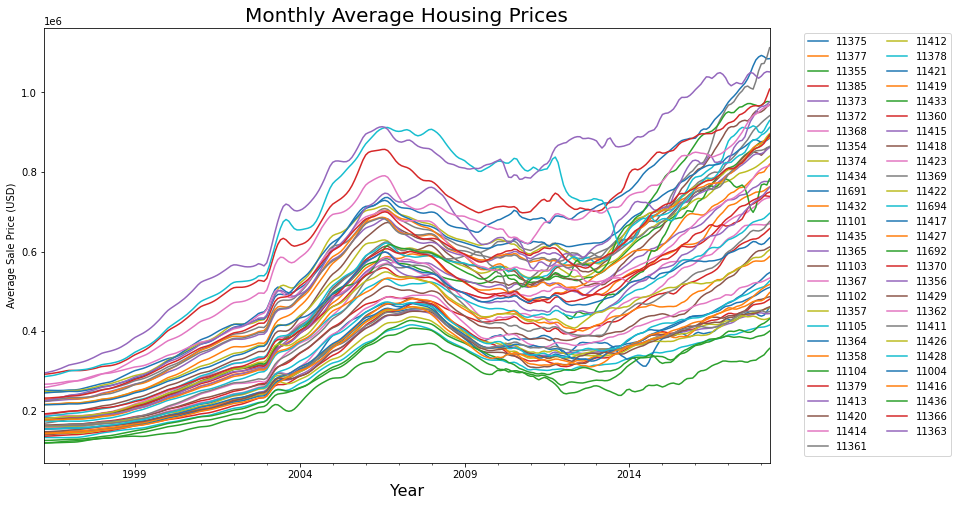

In [14]:
for zipcode in queens_ny_df.RegionName.unique(): 
    queens_ny_df[queens_ny_df.RegionName == zipcode]['value'].plot(figsize = (13,8), label=zipcode)

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', ncol=2)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average Sale Price (USD)")
plt.title('Monthly Average Housing Prices', fontsize = 20);

Let's look at data after 2011 when the housing crash recovery was in full effect

In [16]:
queensdf2011 = queens_ny_df['2011':]
monthly_avg = queensdf2011.groupby('time')['value'].mean()

In [17]:
monthly_avg.head()

time
2011-01-01    468388.888889
2011-02-01    470470.370370
2011-03-01    470820.370370
2011-04-01    471833.333333
2011-05-01    474103.703704
Name: value, dtype: float64

## Stationarity

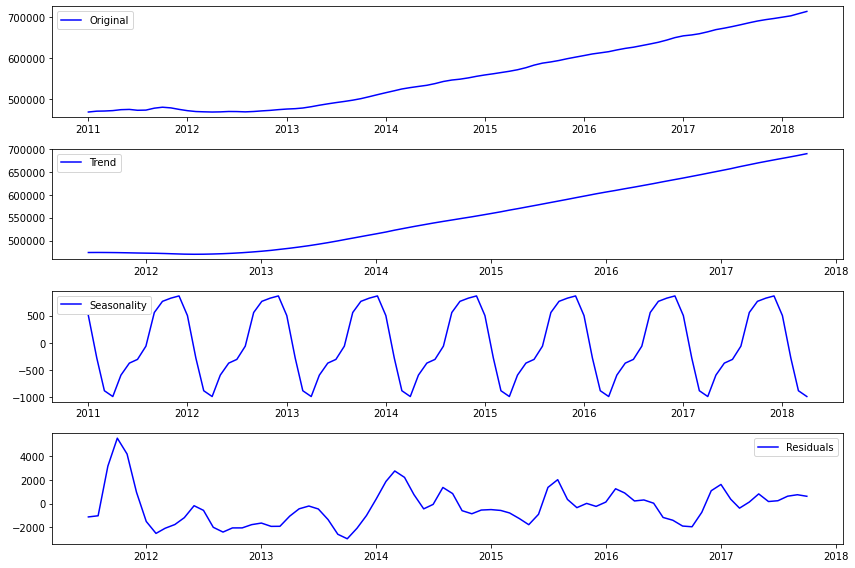

In [18]:
decomposition = sm.tsa.seasonal_decompose(monthly_avg, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(monthly_avg, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

Looking at the plot showing the median home values over time, you can see the general upward trend with a downturn occuring at the end of 2008 into 2009 that can most likely be attributed to the housing crash of 2008. Also there are 3 zipcodes for which there is no data prior to 2004. 

In [19]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

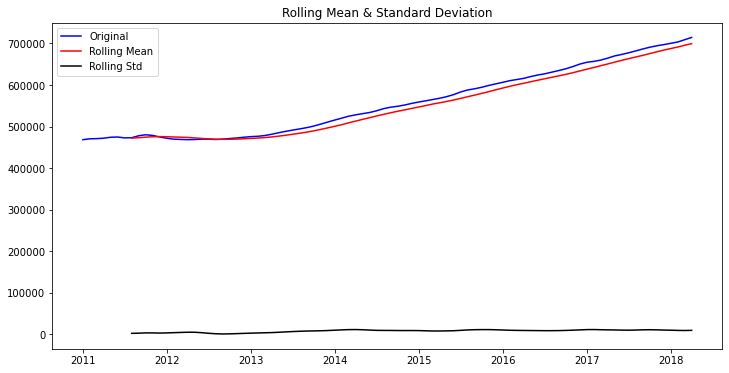

Results of Dickey-Fuller Test: 

Test Statistic                  0.592044
p-value                         0.987418
#Lags Used                      9.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


In [20]:
stationarity_check(monthly_avg)

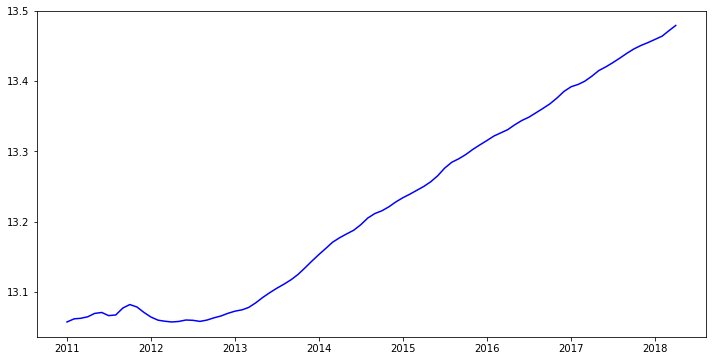

In [21]:
ts_log = np.log(monthly_avg)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');

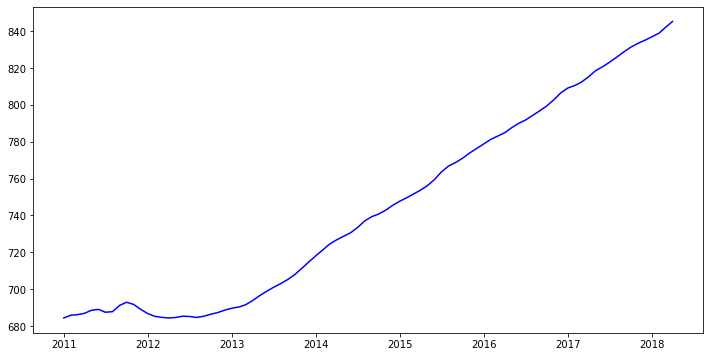

In [22]:
ts_sqrt = np.sqrt(monthly_avg)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

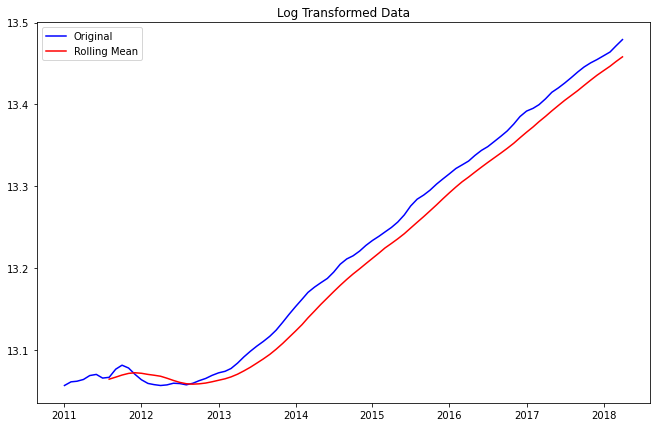

In [24]:
roll_mean = np.log(monthly_avg).rolling(window=8).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(monthly_avg), color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [25]:
data_minus_roll_mean = np.log(monthly_avg) - roll_mean

# Print the first 10 rows
data_minus_roll_mean.head(10)

time
2011-01-01         NaN
2011-02-01         NaN
2011-03-01         NaN
2011-04-01         NaN
2011-05-01         NaN
2011-06-01         NaN
2011-07-01         NaN
2011-08-01    0.002268
2011-09-01    0.009686
2011-10-01    0.012040
Name: value, dtype: float64

In [26]:
data_minus_roll_mean.dropna(inplace=True)

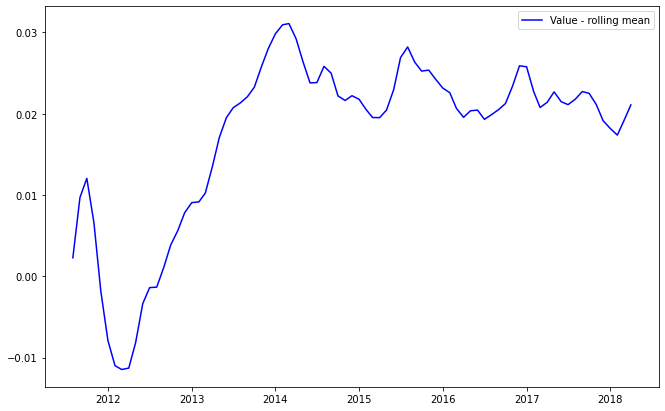

In [27]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Value - rolling mean')
plt.legend(loc='best')
plt.show(block=False)

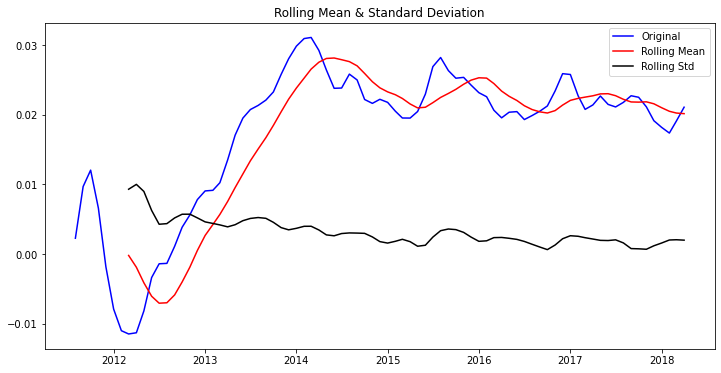

Results of Dickey-Fuller Test: 

Test Statistic                 -3.104175
p-value                         0.026246
#Lags Used                     10.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


In [28]:
stationarity_check(data_minus_roll_mean)

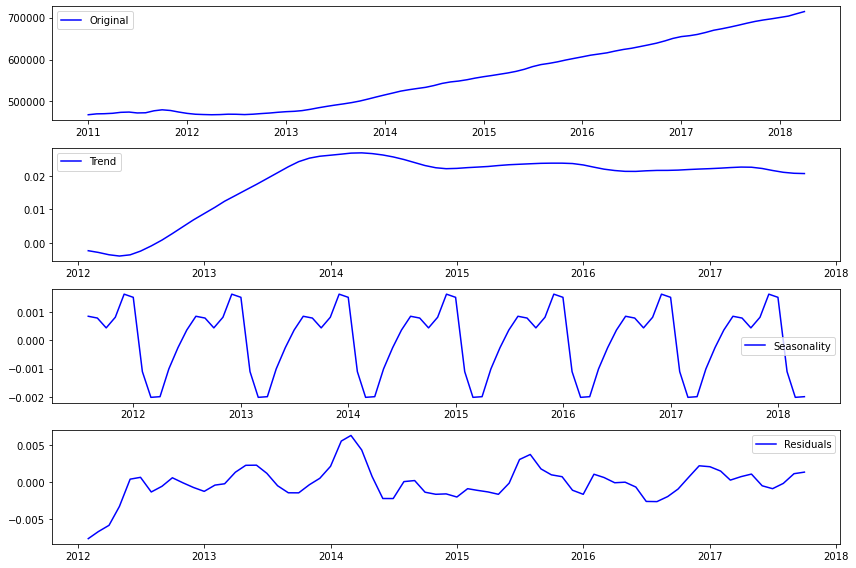

In [29]:
decomposition2 = sm.tsa.seasonal_decompose(data_minus_roll_mean, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition2.trend
seasonal = decomposition2.seasonal
residual = decomposition2.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(monthly_avg, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

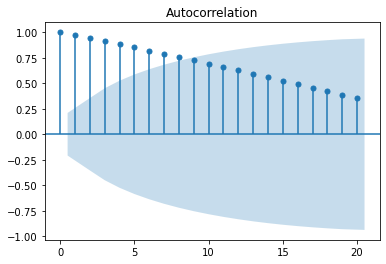

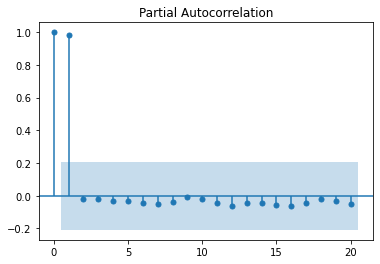

In [30]:
tsa.plot_acf(monthly_avg);
tsa.plot_pacf(monthly_avg);

<AxesSubplot:xlabel='time'>

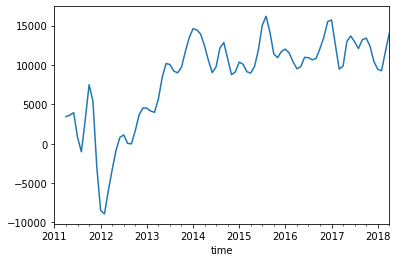

In [31]:
monthly_avg.diff(periods=3).plot()

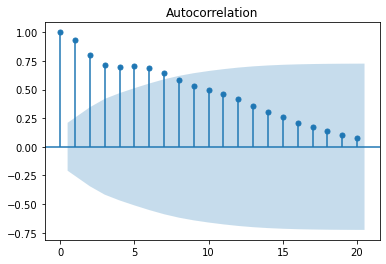

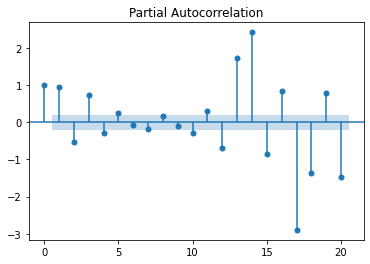

In [32]:
tsa.plot_acf(monthly_avg.diff(periods=3).bfill()); 
tsa.plot_pacf(monthly_avg.diff(periods=3).bfill()); 